## Problem Set #4 NYU
Juan Martin Morelli
N12699038

In [3]:
from numba import jit
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [20]:
# In the following block I will define the functions for generating the AR1 data,
# estimating the AR process and simulating.
# After each definition I call for the numba version.


# Define the AR1 data generating function
def gen_ar1(N,params):
    # order of params: alpha, beta, sigma
    # beta is the constant, alpha is the AR coefficient, sigma is the s.d.
    alpha = params[0]
    beta  = params[1]
    sigma = params[2]
    x = np.zeros(N)
    for i in range(N-1):
        x[i+1] = beta + alpha*x[i] + sigma*np.random.randn()
    
    return x

gen_ar1_numba = jit(gen_ar1)  


# Define the AR1 estimating function
def est_ar1(N,data):
    intercept = np.ones(N-1)
    b2 = data[0:-1]
    xx = np.concatenate((intercept, b2))
    XT = xx.reshape(2,N-1)
    X = XT.T
    Y = data[1:N]
    bhat = np.dot(inv(np.dot(XT,X)),(np.dot(XT,Y)))
    
    return bhat

est_ar1_numba = jit(est_ar1)


# Define the simulation function
def simul(N,params,S_N):
    bet_hat = 0.0
    for i in range(S_N):
        data = gen_ar1_numba(N,params)
        bhat = est_ar1_numba(N,data)
        bet_hat += bhat[1]
    
    bhat_avg = bet_hat/S_N
    
    return bhat_avg
    
simul_numba = jit(simul)


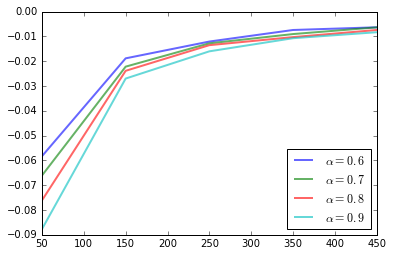

CPU times: user 12.2 s, sys: 52 ms, total: 12.2 s
Wall time: 12.2 s


In [24]:
%%time

%matplotlib inline
# Second block. Now I define the vectors for alphas and samples sizes.
# Then I call for each alpha and sample size the simulation function.
alphas = np.array([0.6, 0.7, 0.8, 0.9])
N_nums = np.arange(50,500,100)

bias = np.zeros(((len(N_nums)),len(alphas)))
S_N = 10000 # number of simulations

for a_i in range(len(alphas)):
    alpha = alphas[a_i]
    # does not work if you put [alpha, 0.0, 0.3]   
    params = (alpha, 0.0, 0.3)
    for N_i in range(len(N_nums)):
        N = N_nums[N_i]
        bsim = simul_numba(N,params,S_N)
        bias[N_i,a_i] = bsim - alpha

# Now I plot
fig, ax = plt.subplots()
for a_i in range(len(alphas)):
    current_label = r'$\alpha = {0:.1f}$'.format(alphas[a_i])
    ax.plot(N_nums, bias[:,a_i], linewidth=2, alpha=0.6, label=current_label)
ax.legend(loc='lower right')
plt.show()

In [ ]:
# The %time command gave:
# CPU times: user 3 µs, sys: 0 ns, total: 3 µs
# Wall time: 5.01 µs

# All in all it took approx 10 seconds.
# I got the same plot as in the assignment.